# Tayara Real Estate EDA: Rent vs Sale

This notebook explores and visualizes your cleaned Tayara dataset,
focusing on the differences between listings **for rent** and **for sale**.

- All visualizations are split by `offer_type` (rent/sale).
- Useful for understanding each segment, guiding modeling, and business reporting.

## 1. Load Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('tayara_real_estate_cleaned_offer_by_text_and_price.csv')
print(df['offer_type'].value_counts())
df.head()

offer_type
rent       4881
sale       3853
unknown     320
Name: count, dtype: int64


,page,title,price,price_amount,price_currency,location,surface_m2,rooms,property_type,offer_type,listing_date,url
0,1,Studio Luxe à louer,270 DT,270.0,DT,Ariana,NaN,NaN,studio,rent,2 minutes ago,https://www.tayara.tn/item/appartements/ariana...
1,1,📍ENNASR 2 : APPARTEMENT S+3 A LOUER,1450 DT,1450.0,DT,Ariana,NaN,3.0,appartement,rent,2 minutes ago,https://www.tayara.tn/item/appartements/ariana...
2,1,A louer s1 meublé manar1,800 DT,800.0,DT,Tunis,NaN,NaN,NaN,rent,3 minutes ago,https://www.tayara.tn/item/appartements/tunis/...
3,1,📍 NOUVELLE ARIANA : BUREAU H+3 SPACIEUX À LOUER,1400 DT,1400.0,DT,Ariana,NaN,NaN,bureau,rent,3 minutes ago,https://www.tayara.tn/item/bureaux-et-plateaux...
4,1,ENNASR 1 : APPARTEMENT S+3 RICHEMENT MEUBLÉ OU...,1400 DT,1400.0,DT,Ariana,NaN,3.0,appartement,rent,3 minutes ago,https://www.tayara.tn/item/appartements/ariana...


## 2. Split Data: Rent vs Sale

In [2]:
rent = df[df['offer_type'] == 'rent'].copy()
sale = df[df['offer_type'] == 'sale'].copy()
print(f"Rent listings: {len(rent)}\nSale listings: {len(sale)}")

Rent listings: 4881
Sale listings: 3853


## 3. Count & Price Distribution by Location

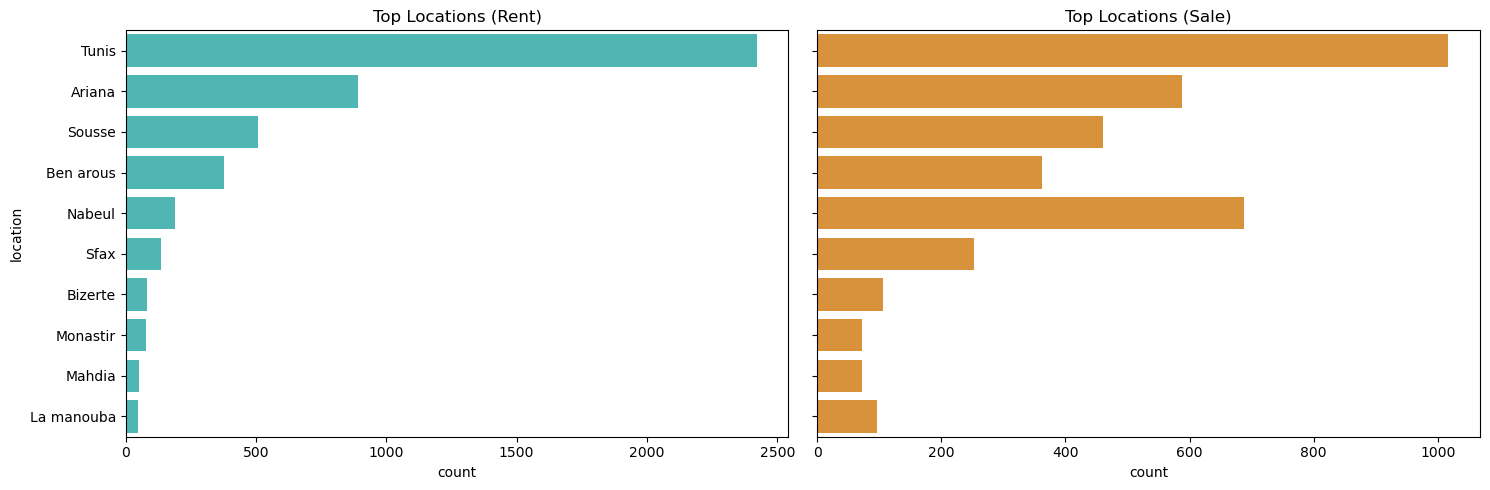

C:\Users\user\AppData\Local\Temp\ipykernel_9212\740538863.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='location', y='price_amount', data=rent[rent['location'].isin(rent['location'].value_counts().head(10).index)],


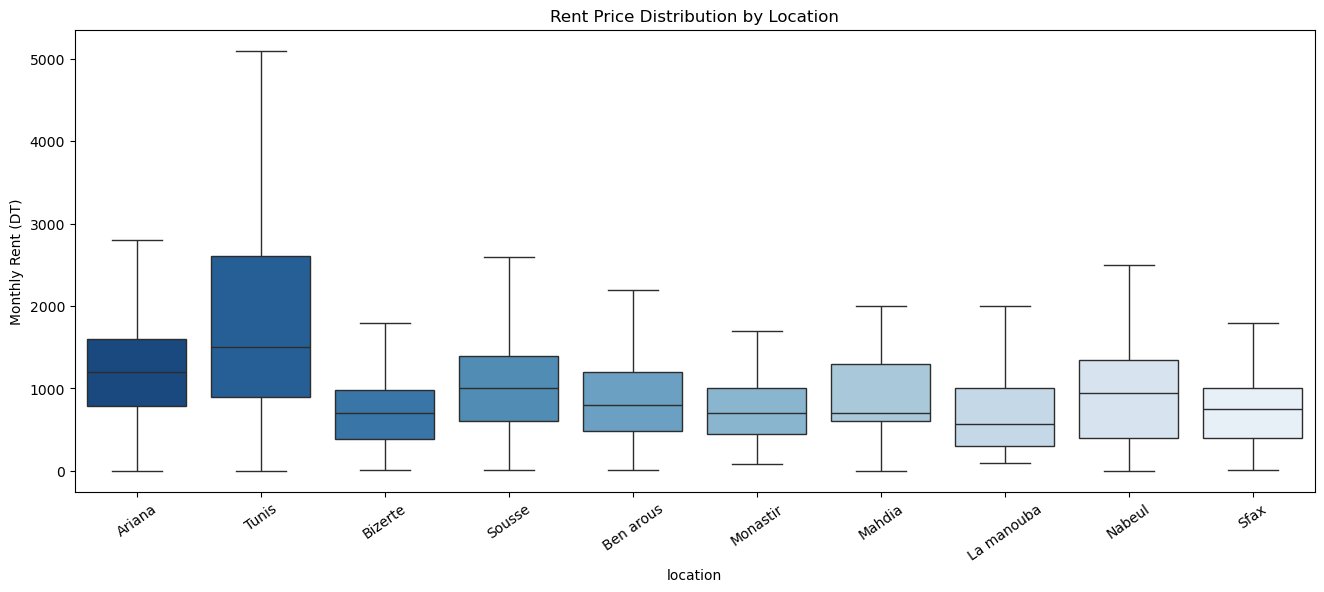

C:\Users\user\AppData\Local\Temp\ipykernel_9212\740538863.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='location', y='price_amount', data=sale[sale['location'].isin(sale['location'].value_counts().head(10).index)],


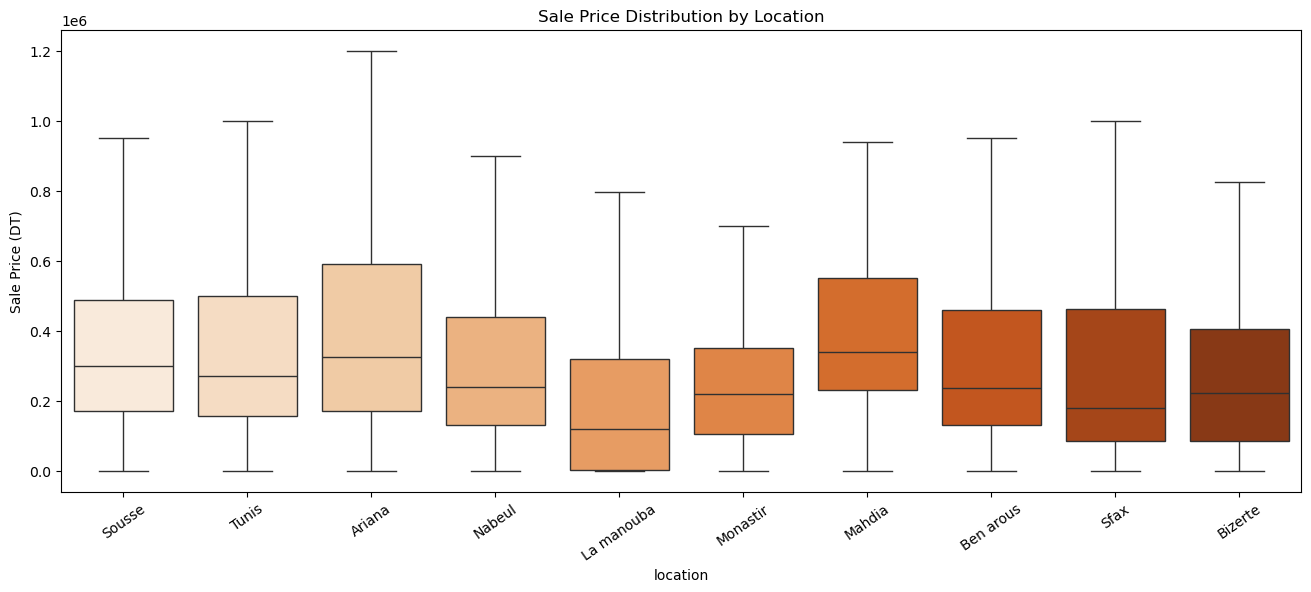

In [3]:
# Count per location
fig, axs = plt.subplots(1, 2, figsize=(15,5), sharey=True)
sns.countplot(y='location', data=rent, order=rent['location'].value_counts().head(10).index, ax=axs[0], color='#3ec7c4')
sns.countplot(y='location', data=sale, order=sale['location'].value_counts().head(10).index, ax=axs[1], color='#f39422')
axs[0].set_title('Top Locations (Rent)')
axs[1].set_title('Top Locations (Sale)')
plt.tight_layout(); plt.show()

# Price boxplot by location (top 10)
plt.figure(figsize=(16,6))
sns.boxplot(x='location', y='price_amount', data=rent[rent['location'].isin(rent['location'].value_counts().head(10).index)],
            palette='Blues_r', showfliers=False)
plt.title('Rent Price Distribution by Location')
plt.ylabel('Monthly Rent (DT)')
plt.xticks(rotation=35)
plt.show()

plt.figure(figsize=(16,6))
sns.boxplot(x='location', y='price_amount', data=sale[sale['location'].isin(sale['location'].value_counts().head(10).index)],
            palette='Oranges', showfliers=False)
plt.title('Sale Price Distribution by Location')
plt.ylabel('Sale Price (DT)')
plt.xticks(rotation=35)
plt.show()

## 4. Price per m² Distribution

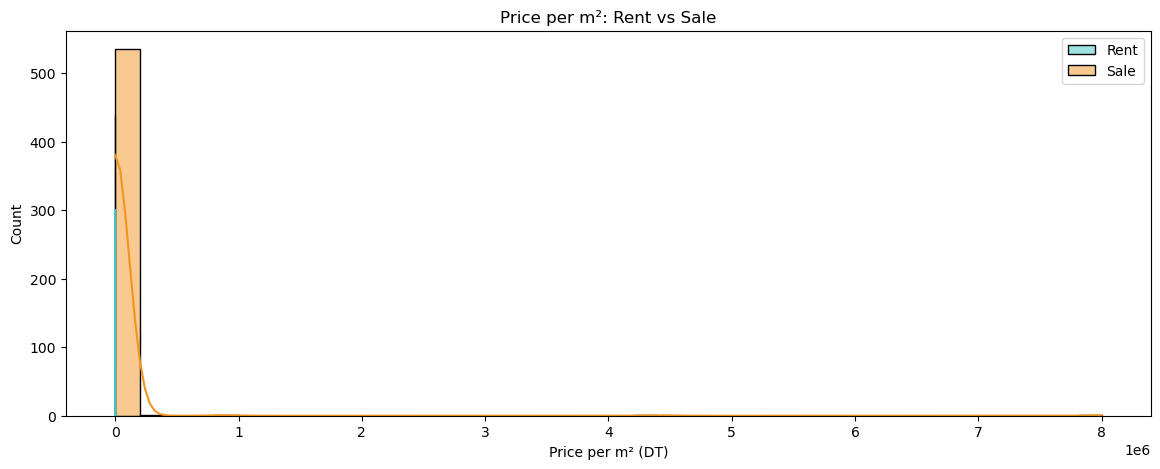

In [4]:
rent['price_per_m2'] = rent['price_amount'] / rent['surface_m2']
sale['price_per_m2'] = sale['price_amount'] / sale['surface_m2']
plt.figure(figsize=(14,5))
sns.histplot(rent['price_per_m2'].replace([np.inf, -np.inf], np.nan).dropna(), bins=40, kde=True, color='#3ec7c4', label='Rent')
sns.histplot(sale['price_per_m2'].replace([np.inf, -np.inf], np.nan).dropna(), bins=40, kde=True, color='#f39422', label='Sale', alpha=0.5)
plt.title('Price per m²: Rent vs Sale')
plt.xlabel('Price per m² (DT)')
plt.legend()
plt.show()

## 5. Surface & Room Distribution

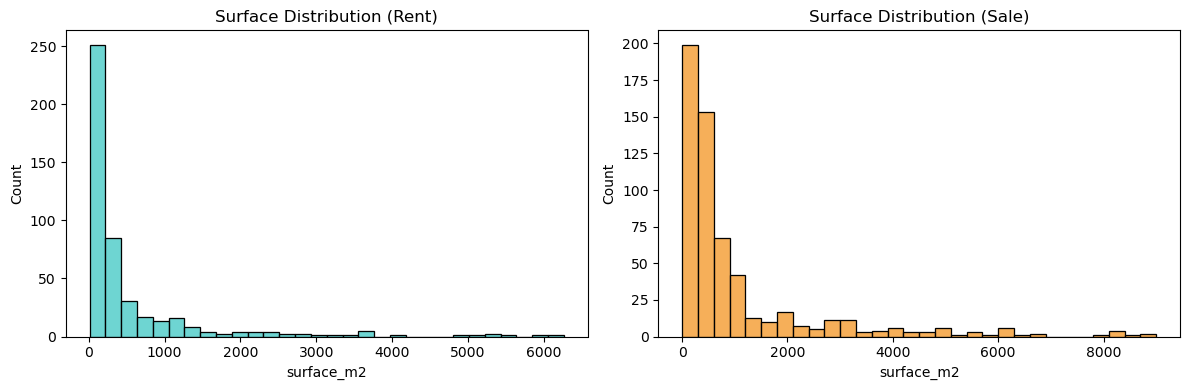

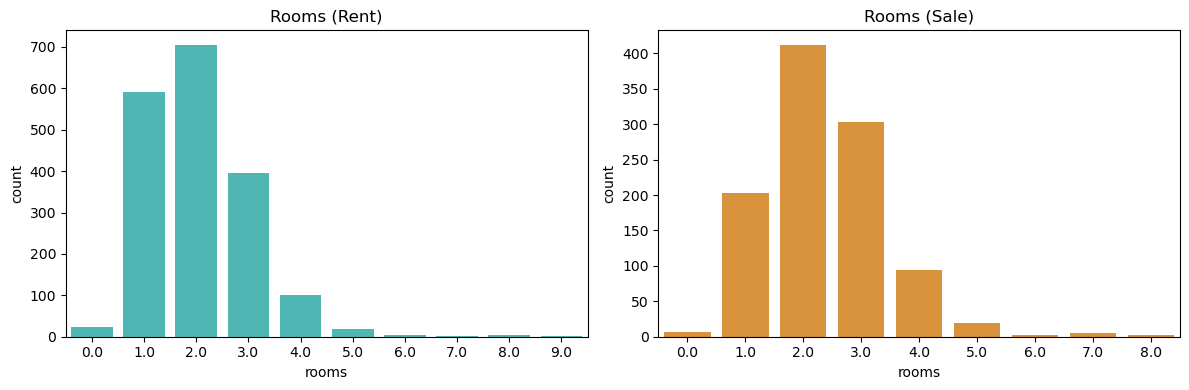

In [5]:
fig, axs = plt.subplots(1,2,figsize=(12,4))
sns.histplot(rent['surface_m2'].dropna(), bins=30, ax=axs[0], color='#3ec7c4')
axs[0].set_title('Surface Distribution (Rent)')
sns.histplot(sale['surface_m2'].dropna(), bins=30, ax=axs[1], color='#f39422')
axs[1].set_title('Surface Distribution (Sale)')
plt.tight_layout(); plt.show()

fig, axs = plt.subplots(1,2,figsize=(12,4))
sns.countplot(x='rooms', data=rent, ax=axs[0], color='#3ec7c4')
axs[0].set_title('Rooms (Rent)')
sns.countplot(x='rooms', data=sale, ax=axs[1], color='#f39422')
axs[1].set_title('Rooms (Sale)')
plt.tight_layout(); plt.show()

## 6. Property Type by Market

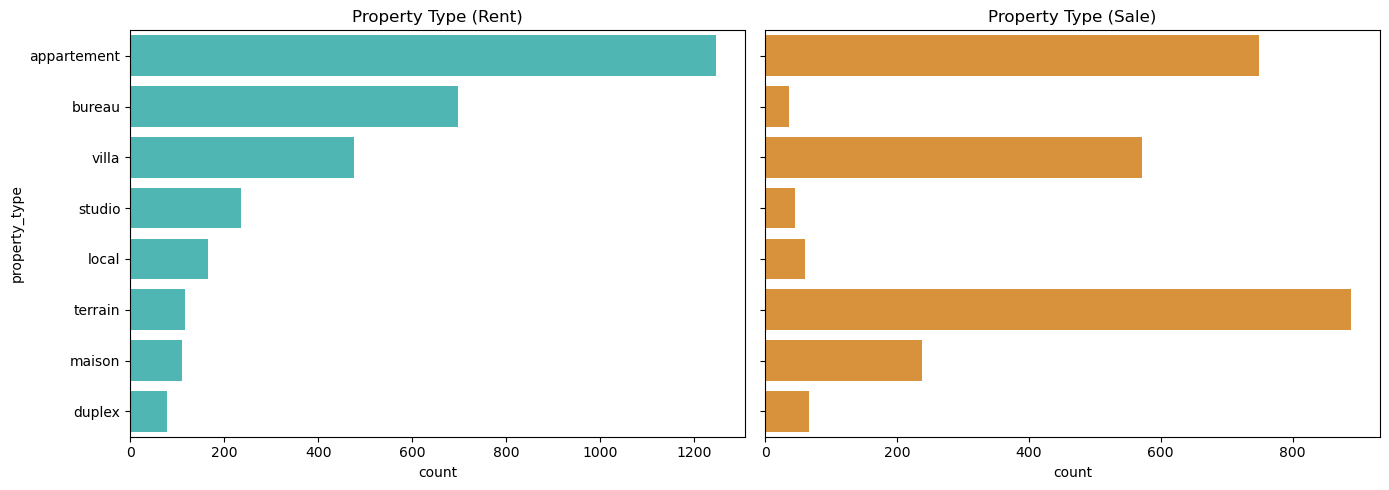

In [6]:
# Bar plot: property type count
fig, axs = plt.subplots(1,2,figsize=(14,5), sharey=True)
sns.countplot(y='property_type', data=rent, order=rent['property_type'].value_counts().index, ax=axs[0], color='#3ec7c4')
axs[0].set_title('Property Type (Rent)')
sns.countplot(y='property_type', data=sale, order=sale['property_type'].value_counts().index, ax=axs[1], color='#f39422')
axs[1].set_title('Property Type (Sale)')
plt.tight_layout(); plt.show()

## 7. Price vs. Surface (Scatter)
Log scale for better readability.

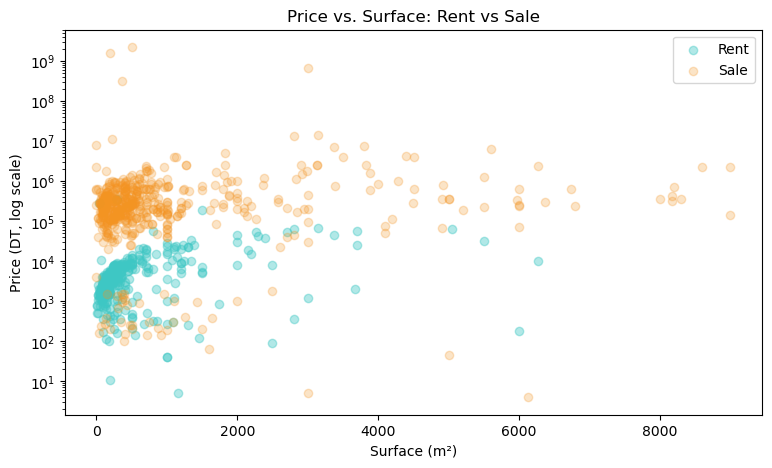

In [7]:
plt.figure(figsize=(9,5))
plt.scatter(rent['surface_m2'], rent['price_amount'], alpha=0.4, label='Rent', color='#3ec7c4')
plt.scatter(sale['surface_m2'], sale['price_amount'], alpha=0.25, label='Sale', color='#f39422')
plt.yscale('log')
plt.xlabel('Surface (m²)')
plt.ylabel('Price (DT, log scale)')
plt.title('Price vs. Surface: Rent vs Sale')
plt.legend(); plt.show()

## 8. Summary Tables
*For reporting, dashboards, or further ML diagnostics.*

In [8]:
rent_summary = rent.groupby('location').agg(
    count=('title','count'), mean_price=('price_amount','mean'), median_price=('price_amount','median'), mean_surface=('surface_m2','mean')).sort_values('count', ascending=False)

sale_summary = sale.groupby('location').agg(
    count=('title','count'), mean_price=('price_amount','mean'), median_price=('price_amount','median'), mean_surface=('surface_m2','mean')).sort_values('count', ascending=False)

display(rent_summary.head(10))
display(sale_summary.head(10))

,count,mean_price,median_price,mean_surface
location,,,,
Tunis,2422,3.009304e+03,1500.0,433.450311
Ariana,892,1.817036e+03,1200.0,652.424242
Sousse,507,1.214705e+05,1000.0,632.727273
Ben arous,376,2.354359e+03,800.0,1033.458333
Nabeul,190,1.099700e+03,950.0,603.166667
Sfax,134,1.295496e+03,750.0,1098.000000
Bizerte,81,8.068590e+02,699.0,693.000000
Monastir,78,8.291746e+02,700.0,925.000000
Mahdia,50,1.062620e+03,700.0,200.000000


,count,mean_price,median_price,mean_surface
location,,,,
Tunis,1017,5.367132e+06,270000.0,748.103774
Nabeul,688,7.791260e+06,240000.0,940.555556
Ariana,587,6.061421e+06,325000.0,1045.058824
Sousse,460,1.227139e+06,300000.0,1405.140000
Ben arous,362,7.979465e+06,235000.0,845.250000
Sfax,252,7.122963e+06,180000.0,1325.367089
Bizerte,106,1.637040e+06,222875.0,1399.181818
La manouba,97,8.375052e+06,120000.0,636.428571
Monastir,73,4.227848e+05,218500.0,1484.666667
